In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
dogs = pd.read_csv('data/akc.csv')

kids = {1:"High", 2:"Medium", 3:"Low"}
dogs["kids"] = dogs['children'].map(kids)

(sec:eda_distributions)=
# What to Look For in a Distribution

Visual displays of a feature can help us see patterns in observations; they are often much better than direct examination of the numbers or strings themselves. 
The simple rug plot locates each observation as a "yarn" in a
"rug" along an axis. The rug plot can be useful when we have a handful of observations,
but it soon gets difficult to distinguish high density (most populated) regions
with, say, even 100 records. The figure below shows a rug plot with about 150 longevity values for dog breeds along the top of a histogram.

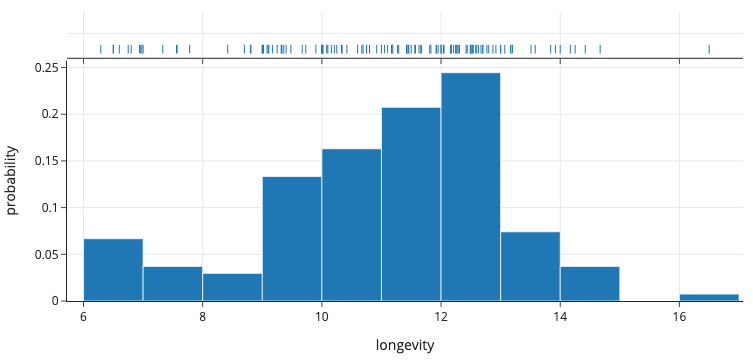

In [6]:
px.histogram(dogs, x="longevity", marginal="rug", nbins=20,
             histnorm='probability', width=350, height=250)

Although we can see an unusually large value that's greater than 16, it's hard
to compare the density of yarns in different regions. Instead, the histogram gives 
a much better sense of the density of observations for various longevity values. 
Similarly, the *density curve* shown below
gives a picture of the regions of high and low density.

In [10]:
from scipy.stats import gaussian_kde

new_x = dogs['longevity'].dropna()
bandwidth = 0.2
xs = np.linspace(min(new_x), max(new_x), 100)
ys = gaussian_kde(new_x, bandwidth)(xs)

f2 = go.Figure(go.Scatter(x=xs, y=ys))

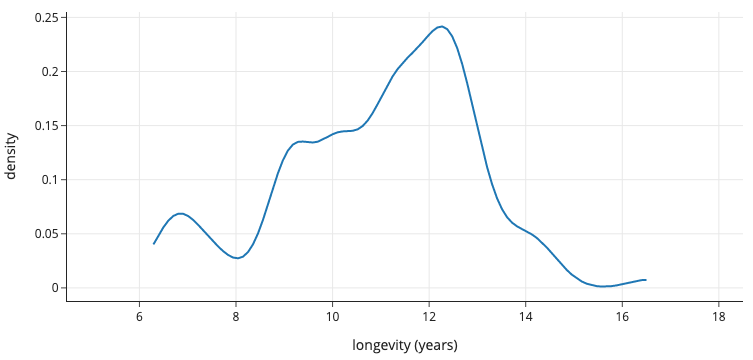

In [16]:
f2.update_xaxes(range=[4.5, 18.5], title="longevity (years)")
f2.update_yaxes(title="density")
f2.update_layout(showlegend=False,width=350, height=250)
f2.show()

In both the histogram and density curve, we can see that the distribution of longevity is asymmetric. There is one main mode around 12 years and a shoulder in the 9-11 year range, meaning
that while 12 is the most common longevity, many breeds have a longevity one to three
years shorter than 12.  We also see a small secondary mode around 7, and a few
breeds with longevity as long as 14-16 years.

When interpreting a histogram or density curve, we examine: the symmetry and
skewness of the distribution; the number, location, and size of high-frequency
regions (modes); the length of tails (often in comparison to a bell-shaped curve);
gaps where no values are observed; and unusually large or anomalous values.
{numref}`Figure %s <example-density-plot>` provides a characterization of a distribution with several of these
features. When we read a distribution, we connect the features that we see in
the plot to the quantity measured.

```{figure} figures/example-density-plot.png
---
name: example-density-plot
width: 350px
---

Example density plot that connects qualities of a distribution to the shape of the density curve.
```

As another example, the distribution of the number of ailments in dog breed, appears in the following histogram. 
A value of zero means this breed has no genetic
ailments, one corresponds to one genetic ailment, and so on. 
From the histogram, we
see that the distribution of ailments is unimodal with a peak at zero. We also
see that the distribution is heavily skewed right, with a long right tail
indicating that some few breeds have between four and nine genetic ailments.
Although quantitative, ailments is discrete because only a few integer values
are possible. For this reason, we centered the bins on the integers so the
bin from 1.5 to 2.5 contains only those breeds with two ailments. We also made
the rightmost bin wider. We lumped into one bin all of the breeds with four to
nine ailments. When bin counts are small, we use wider bins to further smooth
the distribution because we do not want to read too much into the fluctuations
of small numbers. In this case, none of the breeds have six or seven ailments,
but some had four, five, eight and nine.

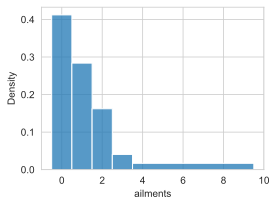

In [14]:
bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 9.5]
sns.histplot(data=dogs, x="ailments", bins=bins, stat="density");

Density in the y-axis
: Notice that the y-axis in the histogram of longevity and the histogram of ailments are both labeled "Density". 
The term "density" implies that the total area of the bars in the
histogram is 1. We can think of the histogram as a skyline with tall buildings
having denser populations. To find the fraction of observations in any bin, we
compute the area of the rectangle. For example, the rectangle that runs
from 3.5 to 9.5 in the ailments histogram contains about 10% of the breeds: 6 (width) × 0.017 (height) is roughly 0.10. If all of the bins are the same width, then the
"skyline" will look the same whether the y-axis represents counts or density.
Changing the y-axis to counts in this histogram
would give a misleading picture of a very large rectangle in the right tail.

With a histogram we hide the details of individual yarns in a rug plot in order
to view the general features of the distribution. Smoothing refers to this
process of replacing sets of points with rectangles; we choose not to show
every single point in the dataset in order to reveal broader trends. We might
want to smooth out these points because: this is a sample and we believe that
other values near the ones we observed are reasonable; and/or we want to focus
on general structure rather than individual observations. Without the rug, we
can't tell where the points are in a bin.

Smooth density curves, like the one we showed earlier for longevity, also have the property that the total area under the
curve sums to 1. The density curve uses a smooth *kernel* function to spread out the
individual yarns and is some times referred to as a *kernel density estimate* or kde for short.

Bar Plot ≠ Histogram
: With qualitative data, the bar plot serves a similar
role to the histogram. The bar plot gives a visual presentation of the
"popularity" or frequency of different groups. However, we cannot interpret the
shape of the bar plot in the same way as a histogram. Tails and symmetry do not
make sense in this setting. Also, the frequency of a category is represented by
the height of the bar, and the width carries no information.
The two bar charts below display identical information about the
the number of breeds in a category; the only difference is in the width of the bars.
In the extreme, the
line plot on the right eliminates the bars entirely and represents
each count by a single dot. (Without the connecting lines, the right most
figure is called a dot chart.) Reading this line plot, we see there are few breeds
that are not suitable for children.

In [49]:
kid_counts = dogs.groupby(['kids']).count()
kid_counts = kid_counts.reindex(["High", "Medium", "Low"])

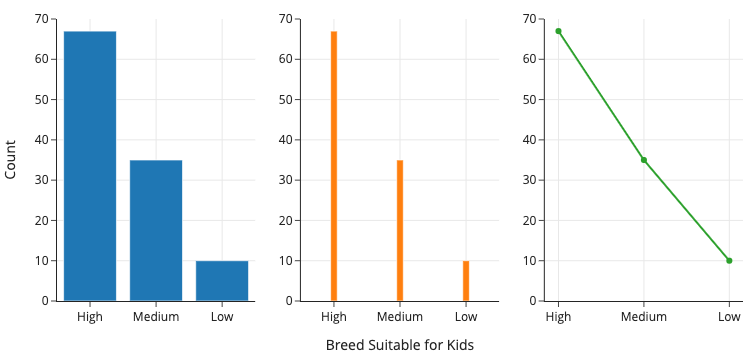

In [50]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Bar(x=kid_counts.index, y=kid_counts['breed']), row=1, col=1)

fig.add_trace(go.Bar(x=kid_counts.index, y=kid_counts['breed']), row=1, col=2)
fig.update_traces(width=0.1, row=1, col=2)

fig.add_trace(go.Scatter(x=kid_counts.index, y=kid_counts['breed'],
                        mode='markers+lines'), row=1, col=3)

fig.update_xaxes(title='Breed Suitable for Kids', row=1, col=2)
fig.update_yaxes(title='Count', row=1, col=1)

fig.update_yaxes(range=[0,70])
fig.update_layout(showlegend=False,width=650, height=250)              
fig.show()

Now that we have covered how to examine distributions of single features, we
turn to the situation when we want to look at two features and how they relate.